# 0.) Import the Credit Card Fraud Data From CCLE

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_csv("Lab5_FraudData.csv")

In [48]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [49]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\steve\AppData\Local\Temp\ipykernel_2572\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\steve\AppData\Local\Temp\ipykernel_2572\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [52]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [53]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)
Xs_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [54]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [55]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(Xs_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(Xs_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(Xs_train, y_train)

# 3.) Train three logistic regression models

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [58]:
over_log.score(Xs_test, y_test)

0.9089469517022961

In [59]:
under_log.score(Xs_test, y_test)

0.9141654070395163

In [60]:
smote_log.score(Xs_test, y_test)

0.9091268984380624

In [61]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [62]:
# Sensitivity here in credit fraud is more important as seen from last class

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
y_true = y_test

In [65]:
y_pred = over_log.predict(Xs_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75529,  7515],
       [   75,   239]], dtype=int64)

In [66]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7611464968152867


In [67]:
y_pred = under_log.predict(Xs_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75964,  7080],
       [   75,   239]], dtype=int64)

In [68]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7611464968152867


In [69]:
y_pred = smote_log.predict(Xs_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75544,  7500],
       [   75,   239]], dtype=int64)

In [70]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7611464968152867


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [71]:
raw_temp = pd.concat([X_train, y_train], axis =1)

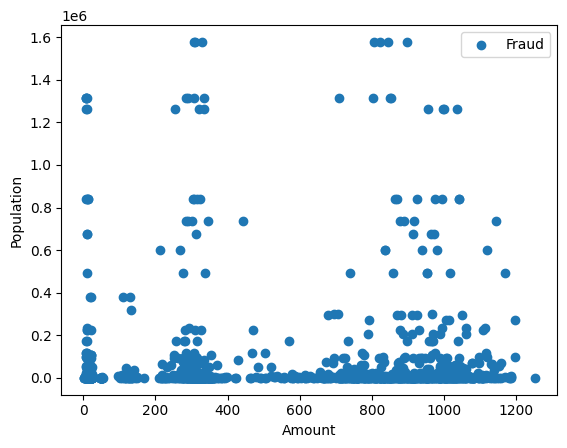

In [72]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [73]:
column_names = X_train.columns.tolist()
smote_X = scaler.inverse_transform(smote_X)
smote_X = pd.DataFrame(data=smote_X, columns=column_names)

In [74]:
raw_temp = pd.concat([smote_X, smote_y], axis =1)

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


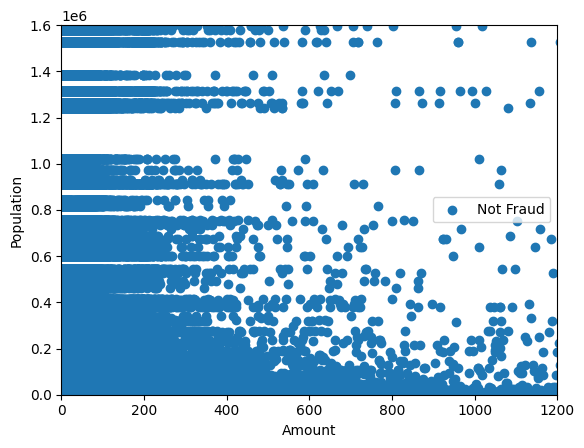

In [75]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

#plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.ylim(0, 1.6e6)
plt.xlim(0, 1200)

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [77]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'smote': SMOTE()
}

model_configs = {
    'LOG': LogisticRegression(),
    'LASSO': LogisticRegression(penalty='l1', C=2., solver='liblinear'),
    'DTREE': DecisionTreeClassifier()
}

In [82]:
def calc_perf_metrics(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_true, y_pred).ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return(sensitivity, specificity, precision, recall, f1)

In [83]:
trained_models = {}
results = []

In [84]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_key, model in model_configs.items():

        combined_key = f"{resample_key}_{model_key}"

        m = model.fit(resample_X, resample_y)

        trained_models[combined_key] = m

        y_pred = m.predict(X_test)

        sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_true, y_pred)

        results.append({"Model": combined_key,
                       'Sensitivity': sensitivity,
                       'Specificity': specificity,
                       'Precision': precision,
                       'Recall': recall,
                       'F1': f1})
        
results = pd.DataFrame(results)

In [86]:
results

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.998954,0.015670,0.015670,0.773885,0.030719
1,over_LASSO,0.999008,0.030744,0.030744,0.761146,0.059100
2,over_DTREE,0.998543,0.581325,0.581325,0.614650,0.597523
3,under_LOG,0.998962,0.015352,0.015352,0.777070,0.030109
4,under_LASSO,0.999026,0.037715,0.037715,0.761146,0.071869
5,under_DTREE,0.999783,0.058905,0.058905,0.945860,0.110904
6,smote_LOG,0.998947,0.016178,0.016178,0.770701,0.031690
7,smote_LASSO,0.998984,0.135484,0.135484,0.735669,0.228826
8,smote_DTREE,0.998698,0.522843,0.522843,0.656051,0.581921


The undersampled decision tree model generally performs the best across most metrics.